In [1]:
# Do NOT modify this block of code

import numpy as np
import numpy.typing as npt
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
# Do NOT modify this block of code

# Dataset 1
x1 = np.array([10.0, 8.0, 13.0, 9.0, 11.0, 14.0, 6.0, 4.0, 12.0, 7.0, 5.0])
y1 = np.array([8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68])

# Dataset 2
x2 = np.array([10.0, 8.0, 13.0, 9.0, 11.0, 14.0, 6.0, 4.0, 12.0, 7.0, 5.0])
y2 = np.array([9.14, 8.14, 8.74, 8.77, 9.26, 8.1, 6.13, 3.1, 9.13, 7.26, 4.74])

# Dataset 3
x3 = np.array([10.0, 8.0, 13.0, 9.0, 11.0, 14.0, 6.0, 4.0, 12.0, 7.0, 5.0])
y3 = np.array([7.46, 6.77, 12.74, 7.11, 7.81, 8.84, 6.08, 5.39, 8.15, 6.42, 5.73])

# Dataset 4
x4 = np.array([8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 19.0, 8.0, 8.0, 8.0])
y4 = np.array([6.58, 5.76, 7.71, 8.84, 8.47, 7.04, 5.25, 12.5, 5.56, 7.91, 6.89])

anscombe_quartet_df = pd.DataFrame([x1, y1, x2, y2, x3, y3, x4, y4], index=['x1', 'y1', 'x2', 'y2', 'x3', 'y3', 'x4', 'y4']).T
anscombe_quartet_df

,x1,y1,x2,y2,x3,y3,x4,y4
0,10.0,8.04,10.0,9.14,10.0,7.46,8.0,6.58
1,8.0,6.95,8.0,8.14,8.0,6.77,8.0,5.76
2,13.0,7.58,13.0,8.74,13.0,12.74,8.0,7.71
3,9.0,8.81,9.0,8.77,9.0,7.11,8.0,8.84
4,11.0,8.33,11.0,9.26,11.0,7.81,8.0,8.47
5,14.0,9.96,14.0,8.10,14.0,8.84,8.0,7.04
6,6.0,7.24,6.0,6.13,6.0,6.08,8.0,5.25
7,4.0,4.26,4.0,3.10,4.0,5.39,19.0,12.50
8,12.0,10.84,12.0,9.13,12.0,8.15,8.0,5.56
9,7.0,4.82,7.0,7.26,7.0,6.42,8.0,7.91


In [3]:
# Do NOT modify this block of code

def fit_regression_line(x: npt.NDArray[np.float64], y: npt.NDArray[np.float64]) -> npt.NDArray[np.float64]:
    """ function to fit a regression line on a data.
        args:
            x is the independent variable,
            y is the dependent variable.
        return: a 1-D numpy array of length 2 such that its first element is beta_0 and its second element is beta_1
    """
    beta_1 = (((x - x.mean()) * (y - y.mean())).sum()) / ((x - x.mean())**2).sum()

    beta_0 = y.mean() - beta_1 * x.mean()

    return np.array([beta_0, beta_1])

In [4]:
# Do NOT modify this block of code
def r_squared(x: npt.NDArray[np.float64], y: npt.NDArray[np.float64]) -> np.float64:
    """ function to the r-square score of a fitted regression line.
        args:
            x is the independent variable,
            y is the dependent variable.
        return: the r-squared score
    """
    beta_0, beta_1 = fit_regression_line(x, y)
    y_hat = beta_1 * x + beta_0

    return (np.corrcoef(y_hat, y, rowvar=False)[0, 1])**2

In [5]:
# Do NOT modify this block of code

def summary_statistics(data_df: pd.DataFrame) -> npt.NDArray[np.float64]:
    """ function to calculate some summary statistics.
    args:
        data_df is the input dataframe.
    return:
        a pandas dataframe showing the summary statistics all pairs of x_i and y_i
    """

    arr_result = np.zeros((8, data_df.shape[1] // 2))

    for i in range(0, data_df.shape[1], 2):
        x = data_df.iloc[:, i]
        y = data_df.iloc[:, i+1]

        arr_result[0, i//2] = np.mean(x) # calculate mean of x
        arr_result[1, i//2] = np.std(x) # calculate the standard deviation of x
        arr_result[2, i//2] = np.mean(y) # calculate mean of y
        arr_result[3, i//2] = np.std(y) # calculate the standard deviation of y
        arr_result[4, i//2] = np.corrcoef(x, y)[0, 1]

        beta_0, beta_1 = fit_regression_line(x, y)

        arr_result[5, i//2] = beta_0 # calculate beta_0 of regression line
        arr_result[6, i//2] = beta_1 # calculate beta_1 of regression line

        arr_result[7, i//2] = r_squared(x, y) # calculates the r-squared score

    result_df = pd.DataFrame(np.round(arr_result, 2),
                             index=['mean_x', 'std_x', 'mean_y', 'std_y', 'corrcoef_x_y', 'beta_0', 'beta_1', 'R^2'],
                             columns=[f"dataset_{i+1}" for i in range(arr_result.shape[1])]
        )

    return result_df

In [6]:
# Do NOT modify this block of code
summary_statistics(anscombe_quartet_df) # some summary statistics per dataset

,dataset_1,dataset_2,dataset_3,dataset_4
mean_x,9.00,9.00,9.00,9.00
std_x,3.16,3.16,3.16,3.16
mean_y,7.50,7.50,7.50,7.50
std_y,1.94,1.94,1.94,1.94
corrcoef_x_y,0.82,0.82,0.82,0.82
beta_0,3.00,3.00,3.00,3.00
beta_1,0.50,0.50,0.50,0.50
R^2,0.67,0.67,0.67,0.67


# Q1a

Text(0, 0.5, 'y4')

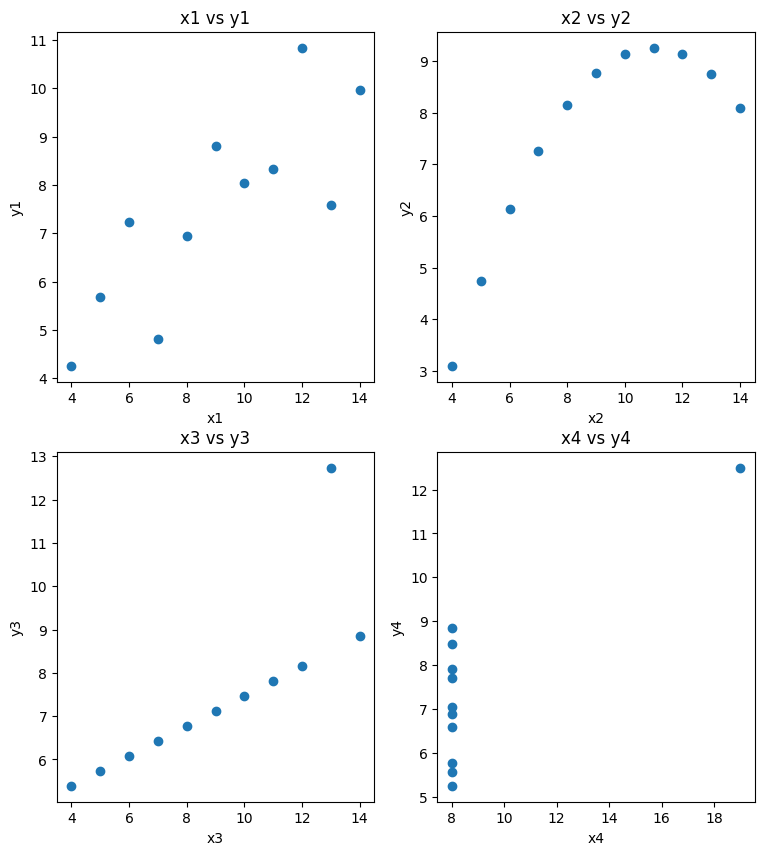

In [7]:
## Your code starts here ##
#scatter plot of each of the datasets

plt.figure(figsize=(9, 10))

plt.subplot(2,2,1)
plt.scatter(anscombe_quartet_df['x1'], anscombe_quartet_df['y1'])
plt.title('x1 vs y1')
plt.xlabel('x1')
plt.ylabel('y1')

plt.subplot(2,2,2)
plt.scatter(anscombe_quartet_df['x2'], anscombe_quartet_df['y2'])
plt.title('x2 vs y2')
plt.xlabel('x2')
plt.ylabel('y2')

plt.subplot(2,2,3)
plt.scatter(anscombe_quartet_df['x3'], anscombe_quartet_df['y3'])
plt.title('x3 vs y3')
plt.xlabel('x3')
plt.ylabel('y3')

plt.subplot(2,2,4)
plt.scatter(anscombe_quartet_df['x4'], anscombe_quartet_df['y4'])
plt.title('x4 vs y4')
plt.xlabel('x4')
plt.ylabel('y4')

## end ##

Your explanation goes here: Visualizing each dataset through scatter plots shows that despite having different variable values in the dataframe, the datasets exhibit similar overall patterns and relationships between variables as seen in the summary statistics.

*Ans*:Similar

# Q1b

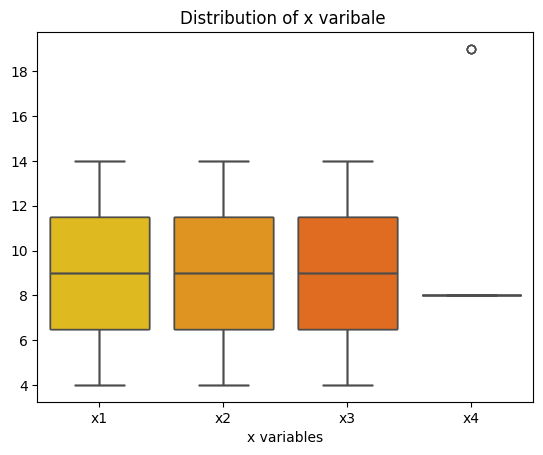

In [8]:
## Your code starts here ##
#Using Seaborn, create multiple boxplots that show the distribution plots of the x variable in
#each datasets. All the boxplots should be in a single plot axes.
new_df = pd.DataFrame({'x1': x1, 'x2': x2, 'x3': x3, 'x4': x4})
for column in new_df.columns:
  sns.boxplot(data=new_df, palette="autumn_r") # the hue parameter is the column in the data to be used for color encoding
  plt.title("Distribution of x varibale ")
  plt.xlabel('x variables')


## end ##

# Q1c

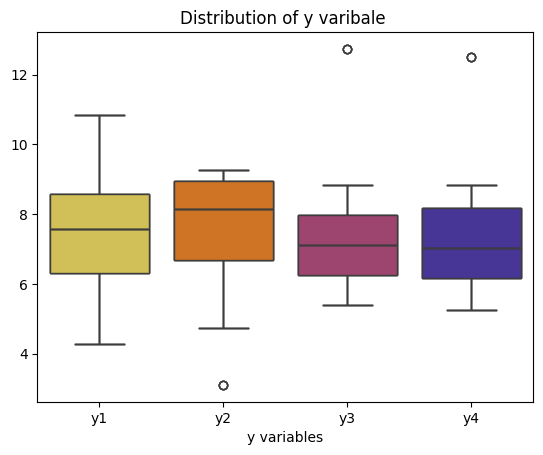

In [9]:
## Your code starts here ##
new_df = pd.DataFrame({'y1': y1, 'y2': y2, 'y3': y3, 'y4': y4})
for column in new_df.columns:
  sns.boxplot(data=new_df, palette="CMRmap_r")
  plt.title("Distribution of y varibale ")
  plt.xlabel('y variables')

## end ##

Loading in the data for Q2

In [10]:
# Do NOT modify this block of code

# loading in the data
google_playstore_df = pd.read_csv("https://raw.githubusercontent.com/MIE223-2024/course-datasets/main/googleplaystore.csv")

print(google_playstore_df.shape)
google_playstore_df.head()

(10841, 13)


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


Cleaning the Data

In [11]:
# Do NOT modify this block of code
google_playstore_df[google_playstore_df['Category'] == '1.9'] # corrupted row

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [12]:
# Do NOT modify this block of code
# Dropping the corrupted row
google_playstore_df = google_playstore_df.drop(10472, axis=0)
google_playstore_df.shape

(10840, 13)

In [13]:
# Do NOT modify this block of code
google_playstore_df.isnull().sum() / google_playstore_df.shape[0] # % of null values per column

App               0.000000
Category          0.000000
Rating            0.135978
Reviews           0.000000
Size              0.000000
Installs          0.000000
Type              0.000092
Price             0.000000
Content Rating    0.000000
Genres            0.000000
Last Updated      0.000000
Current Ver       0.000738
Android Ver       0.000185
dtype: float64

In [14]:
# Do NOT modify this block of code

# Dropping rows with null values
google_playstore_df = google_playstore_df.dropna(axis=0)

print(f"Number of missing values is: {google_playstore_df.isnull().sum().sum()}, shape of data is: {google_playstore_df.shape}")
google_playstore_df.head()

Number of missing values is: 0, shape of data is: (9360, 13)


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [15]:
# Do NOT modify this block of code
google_playstore_df.dtypes # checking the data types

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [16]:
# Do NOT modify this block of code
google_playstore_df.nunique() # checking the number of unique values per feature

App               8190
Category            33
Rating              39
Reviews           5990
Size               413
Installs            19
Type                 2
Price               73
Content Rating       6
Genres             115
Last Updated      1299
Current Ver       2638
Android Ver         31
dtype: int64

In [17]:
# Do NOT modify this block of code
def format_number(num: str) -> float:
    """Function to format a number by converting the place value from string to number e.g 1k to 1000, 1M to 1000000
    """
    num = num.lower() # convert to lowercase

    # if str number can be converted to float without further cleanup, convert it and return it
    try:
        return float(num.strip())
    except ValueError:
        pass

    # if after relacing the place value with number, num is still not convertible to float, return Nan e.g 'Varies with device' in Size column
    try:
        float(num[:-1].strip())
    except ValueError:
        return np.nan

    # else, replace the str place value by multiplying by the appropriate multiple of 10
    suffix_mapper = {'k': 1E3, 'm': 1E6, 'g': 1E9}

    return float(num[:-1]) * suffix_mapper[num[-1]]

In [18]:
# Do NOT modify this block of code
def format_place_value(num: str) -> str:
    """Function to format a number by converting it to its abbreviated place value e.g 1000 to 1k, 1000000 to 1M
    """
    num = int(num.strip("+").strip().replace(",", ""))

    if num >= 1_000_000_000:
        return f"{num // 1_000_000_000}G+"

    if num >= 1_000_000:
        return f"{num // 1_000_000}M+"

    if num >= 1000:
        return f"{num // 1000}k+"

    return f"{num}+"

In [19]:
# Do NOT modify this block of code
google_playstore_df['Log-Reviews'] = np.log(google_playstore_df.loc[:, 'Reviews'].astype(int)) # Converting 'reviews' column to float and taking the log

In [20]:
# Do NOT modify this block of code
google_playstore_df['Price'] = google_playstore_df['Price'].apply(lambda x: float(x.strip("$"))) # stripping $ and converting price to float

In [21]:
# Do NOT modify this block of code
google_playstore_df['Last Updated'] = pd.to_datetime(google_playstore_df['Last Updated']) # converting 'Last Updated' to datetime object

In [22]:
# Do NOT modify this block of code
google_playstore_df['Size'] = google_playstore_df['Size'].apply(format_number) # formating 'Size'. Note that after formatting, Nan values actually
                                                                               # indicate that the 'Size' varies with device.

In [23]:
# Do NOT modify this block of code
google_playstore_df['Installs'] = google_playstore_df['Installs'].apply(format_place_value) # formatting 'Installs'

In [24]:
# Do NOT modify this block of code
google_playstore_df['is_good_rating'] = google_playstore_df.loc[:, 'Rating'].apply(lambda x: 1 if x >= 4 else 0) # creating rating category

In [25]:
# Do NOT modify this block of code
google_playstore_df.head() # checking the head of the cleaned data

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Log-Reviews,is_good_rating
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000000.0,10k+,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,5.068904,1
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000000.0,500k+,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,6.874198,0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700000.0,5M+,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up,11.379508,1
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000000.0,50M+,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up,12.281384,1
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800000.0,100k+,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up,6.874198,1


# Q2a

<Axes: title={'center': 'Correlation Matrix Heatmap'}>

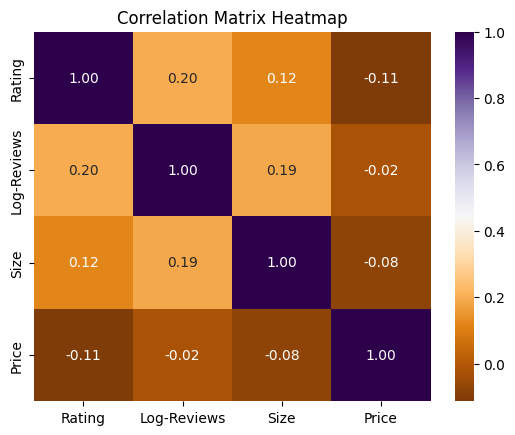

In [26]:
continuous_cols = ['Rating', 'Log-Reviews', 'Size', 'Price']

## Your code starts here ##
paid_apps = google_playstore_df[google_playstore_df['Price'] > 0.0]

corr_arr = paid_apps[continuous_cols].corr(method='pearson', numeric_only=True)
index = np.array(corr_arr.index)
columns = np.array(corr_arr.columns)
corr_arr = corr_arr.values
##create a correlation heatmap showing the Pearson correlation coefficient between all pairs of the continuous features in the subset of the data
#containing ONLY paid apps.
plt.title("Correlation Matrix Heatmap")
sns.heatmap(data=corr_arr, cmap=plt.cm.PuOr,annot=corr_arr, fmt=".2f", xticklabels=columns,yticklabels=index)


## end ##

# Q2b

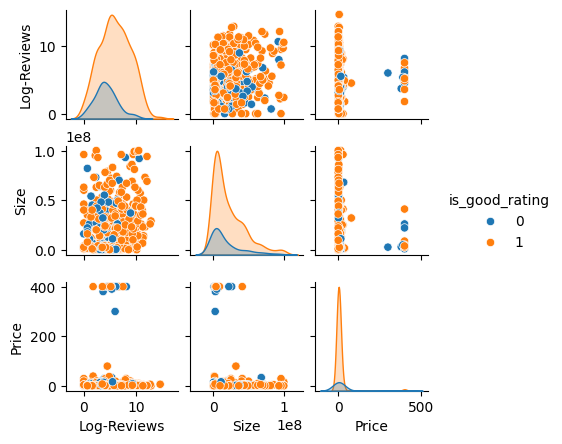

In [27]:
## Your code starts here ##
#Using Seaborn, create a pairplot showing the relationship between all pairs of the continuous
#features (except “Rating” in the list named “continuous cols”) in the subset of the data
#containing ONLY paid apps. Use “is good rating” variable as the hue.
new_continuous_col = [col for col in continuous_cols if col != 'Rating']
sns.pairplot(paid_apps[new_continuous_col + ['is_good_rating']], hue='is_good_rating', height=1.5)
## end ##

# Q2c

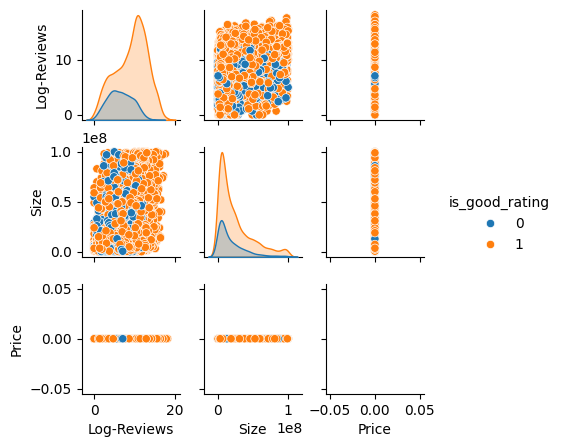

In [28]:
## Your code starts here ##
free_apps = google_playstore_df[google_playstore_df['Price'] == 0.0]
sns.pairplot(free_apps[new_continuous_col + ['is_good_rating']], hue='is_good_rating', height=1.5)
## end ##

# Q2d

In [29]:
# Do NOT modify this block of code
google_playstore_df.nunique() # checking the number of unique values per column

App               8190
Category            33
Rating              39
Reviews           5990
Size               411
Installs            19
Type                 2
Price               73
Content Rating       6
Genres             115
Last Updated      1299
Current Ver       2638
Android Ver         31
Log-Reviews       5990
is_good_rating       2
dtype: int64

In [30]:
# Do NOT modify this block of code

def cal_PMI(var: str, target_var: str = "is_good_rating", data: pd.DataFrame = google_playstore_df) -> pd.DataFrame:
    """function to calculate PMI"""
    contingency_table = pd.crosstab(index=data[var], columns=data[target_var]) # create a contingency table

    n = contingency_table.sum().sum() # total number of data points

    p_of_x_y =  contingency_table / n # calculate joint probability P(x,y)
    p_of_x_y = p_of_x_y.replace(0, 1E-5) # replace zeros because log(0) is undefined

    p_of_x = contingency_table.sum(axis=1) / n # calculate marginal probability P(x)
    p_of_y = contingency_table.sum(axis=0) / n # calculate marginal probability P(y)

    p_of_y_given_x = p_of_x_y.div(p_of_x, axis=0) # calculate conditional probability P(y|x)
    pmi_df = np.log(p_of_y_given_x.div(p_of_y, axis=1)) # calculate PMI for all pairs of x and y

    return pmi_df

In [31]:
# Do NOT modify this block of code
def cal_MI(var: str, target_var: str = "is_good_rating", data: pd.DataFrame = google_playstore_df, per_X: bool = False) -> float|pd.Series:
    """function to calculate MI"""
    contingency_table = pd.crosstab(index=data[var], columns=data[target_var]) # create a contingency table

    n = contingency_table.sum().sum() # total number of data points

    p_of_x_y =  contingency_table / n # calculate joint probability P(x,y)

    pmi_df = cal_PMI(var, target_var=target_var, data=data) # calculate PMI for all pairs of x and y

    if per_X: # if True, return MI of each category in x with target variable
        return (p_of_x_y * pmi_df).sum(axis=1)

    return (p_of_x_y * pmi_df).sum().sum() # else return MI of x and y

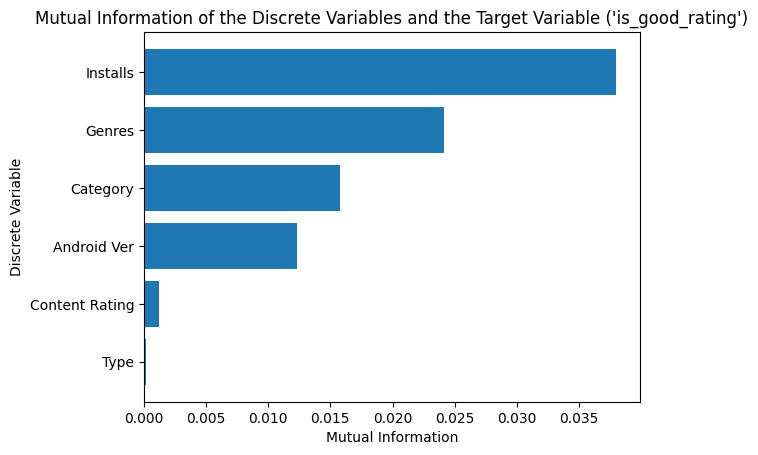

In [32]:
discrete_cols = ['Category', 'Installs', 'Type', 'Content Rating', 'Genres', 'Android Ver']
#a horizontal barplot to rank the discrete features (in the list named “discrete cols”) with
#“is good rating” variable.

## Your code starts here ##
MI_values = []
for col in discrete_cols:
    MI_values.append(cal_MI(col))

sort_idx = np.argsort(MI_values)

plt.barh(np.array(discrete_cols)[sort_idx], np.array(MI_values)[sort_idx])
plt.xlabel("Mutual Information")
plt.ylabel("Discrete Variable")
plt.title("Mutual Information of the Discrete Variables and the Target Variable ('is_good_rating')")
plt.show()


## end ##

# Q2e

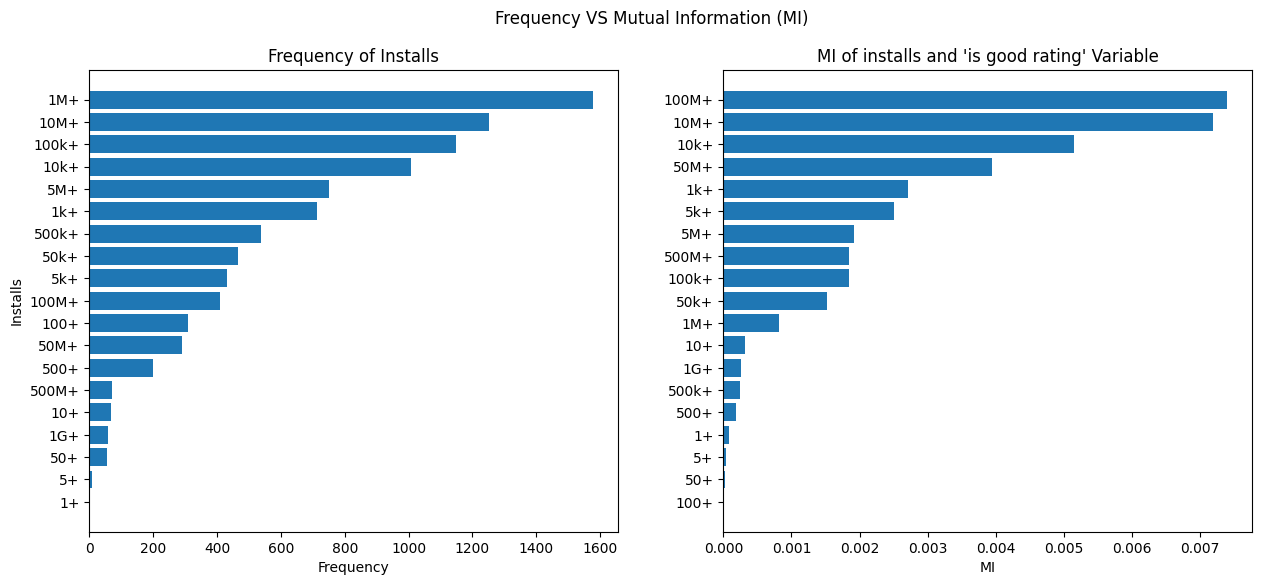

In [33]:
## Your code starts here ##
#a 1 by 2 subplot of Frequency-MI analyses for “Installs” feature.
plt.figure(figsize=(15, 6))

plt.subplot(121)
frequency_count = google_playstore_df['Installs'].value_counts(sort=True, ascending= True)
plt.barh(frequency_count.index, frequency_count.values)
plt.xlabel("Frequency")
plt.ylabel("Installs")
plt.title("Frequency of Installs")
#plt.yticks(rotation=45)

plt.subplot(122)
Installs_MIs = cal_MI("Installs", per_X=True).sort_values(ascending= True)
plt.barh(Installs_MIs.index, Installs_MIs.values)
#plt.yticks(rotation=45)
plt.xlabel("MI")
plt.title("MI of installs and 'is good rating' Variable")

plt.suptitle("Frequency VS Mutual Information (MI)")

plt.show()

## end ##